In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1=pd.read_csv('honeyproduction 1998-2021.csv')
df_1.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df_1.tail()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
980,Virginia,6000.0,40,240000.0,79000.0,8.23,1975000.0,2021
981,Washington,96000.0,32,3072000.0,1206000.0,2.52,7741000.0,2021
982,West Virginia,6000.0,43,258000.0,136000.0,4.80,1238000.0,2021
983,Wisconsin,42000.0,47,1974000.0,750000.0,2.81,5547000.0,2021
984,Wyoming,38000.0,58,2204000.0,242000.0,2.07,4562000.0,2021


In [5]:
df_1.isnull()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
980,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,False,False
982,False,False,False,False,False,False,False,False
983,False,False,False,False,False,False,False,False


In [6]:
df_1.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07,2021.000000


In [7]:
df_1.year=df_1.year.astype('category')
df_1.dtypes

State            object
numcol          float64
yieldpercol       int64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year           category
dtype: object

In [8]:
correlation=df_1.corr()
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.198576,0.949640,0.796897,-0.223360,0.912601
yieldpercol,0.198576,1.000000,0.364392,0.356294,-0.398247,0.224704
totalprod,0.949640,0.364392,1.000000,0.864333,-0.252678,0.900720
stocks,0.796897,0.356294,0.864333,1.000000,-0.284894,0.693372
priceperlb,-0.223360,-0.398247,-0.252678,-0.284894,1.000000,-0.088529
prodvalue,0.912601,0.224704,0.900720,0.693372,-0.088529,1.000000


In [9]:
print(df_1.State.nunique())
print(df_1.year.nunique())

44
24


### So we can observe the following from the above analysis:
### 1) Data has 985 rows and 8 columns
### 2) There is no null value in the data
### 3) we have honey production data for 44 states of US over past 24 years, from 1998 to 2021.

### Q-1) How has honey production yield changed from 1998 to 2021.

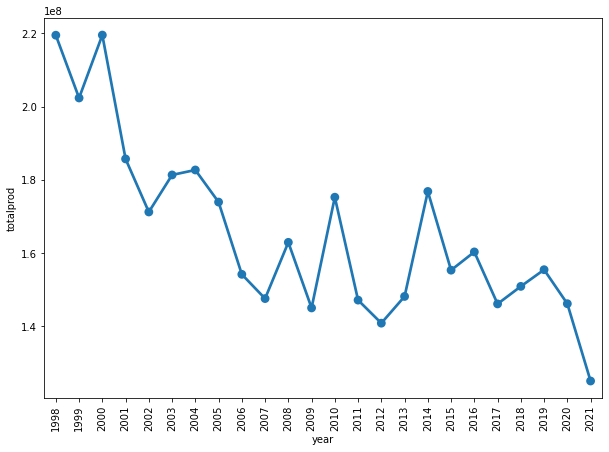

In [10]:
# sol-
plt.figure(figsize=(10,7))
sns.pointplot(x='year',y='totalprod',data=df_1,estimator=sum,ci=None)
plt.xticks(rotation=90)
plt.show()

### so we can conclude from the above plot that with the passes of year the honeyproduction decreases in US.

### Q-2) Over time what are the major production trends across the states.

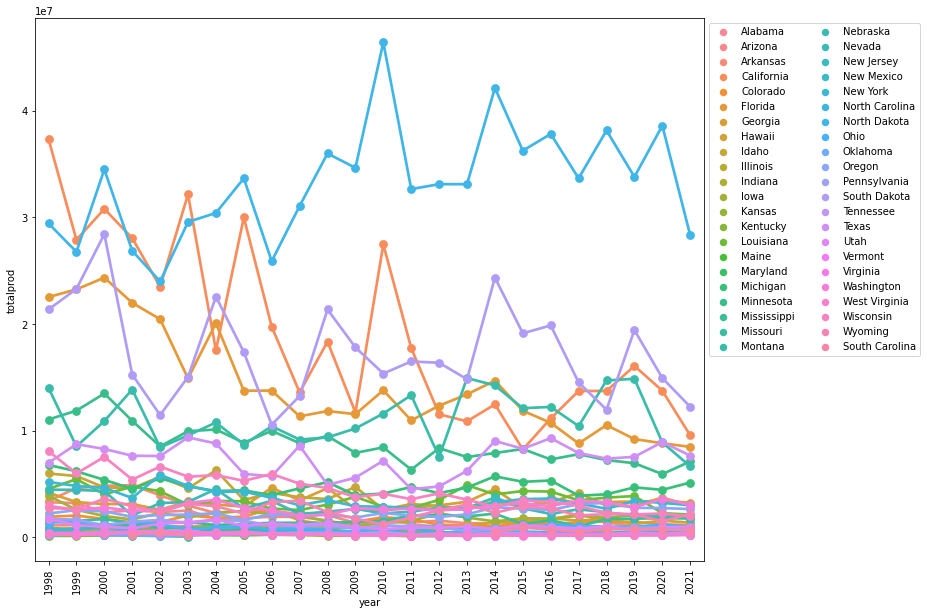

In [11]:
# sol-
plt.figure(figsize=(12,10))
sns.pointplot(x='year',y='totalprod',data=df_1,estimator=sum,ci=None,hue='State')
plt.legend(ncol=2,fontsize=10,markerscale=0.8,bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

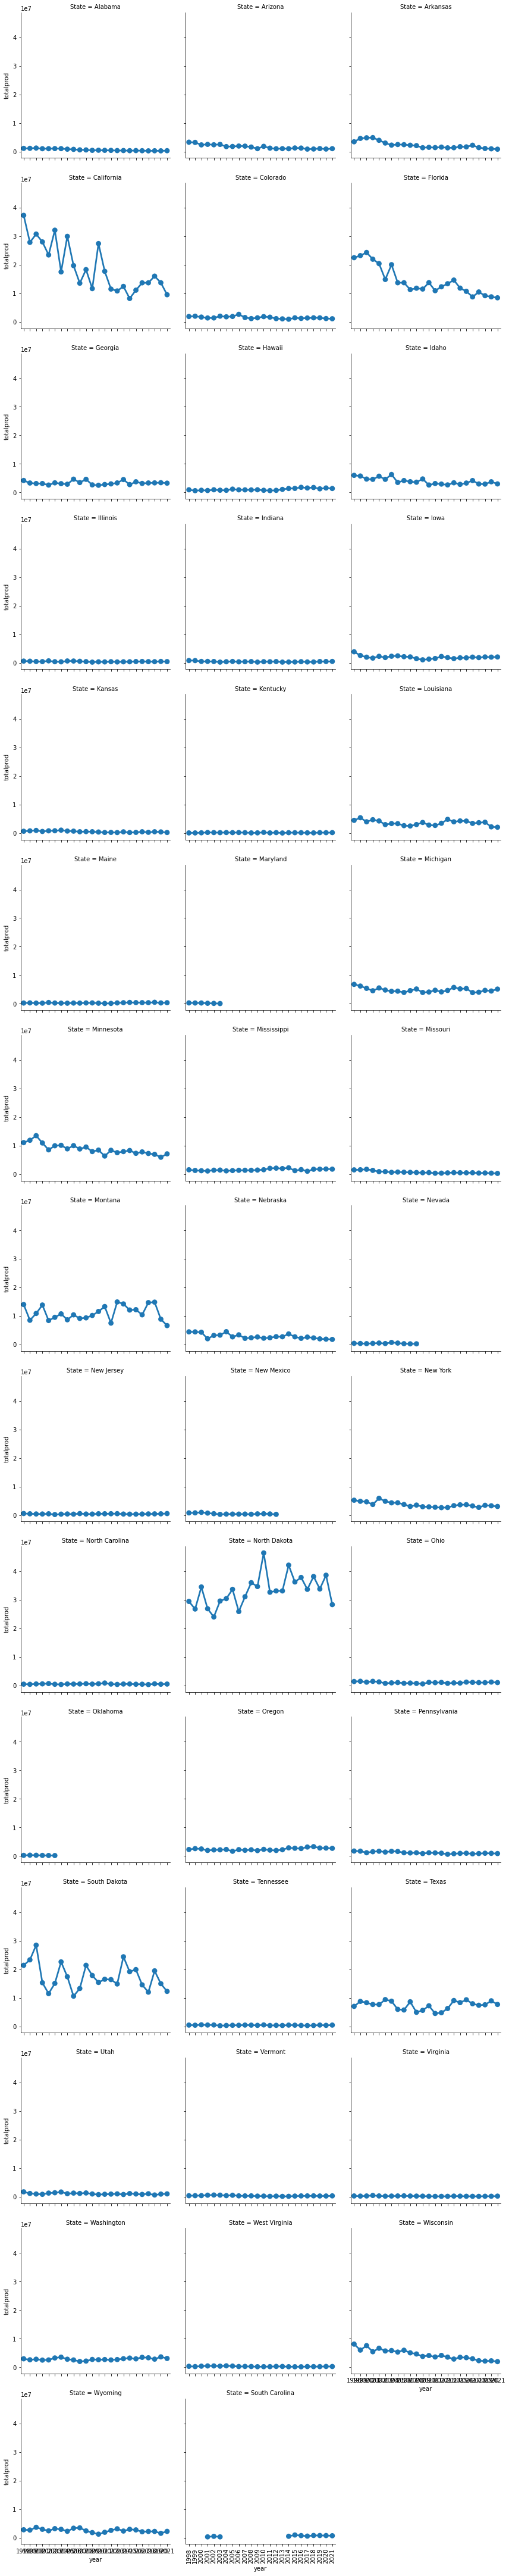

In [13]:
sns.catplot(x='year',y='totalprod',data=df_1,estimator=sum,col='State',kind='point',height=4,col_wrap=3)
plt.xticks(rotation=90)
plt.show()

### So we can conclude from the above observation that the most honeyproducing states in US are California,Florida,North Dakota,South Dakota and Montana.
###   But there is continuous decrease in production of honey in California and Florida with the passage of time.
###   North Dakota has gradual increase in honey production with the passes of year.

### Q-3) Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006,which was when concern over colony collapse disorder spread nationwide.

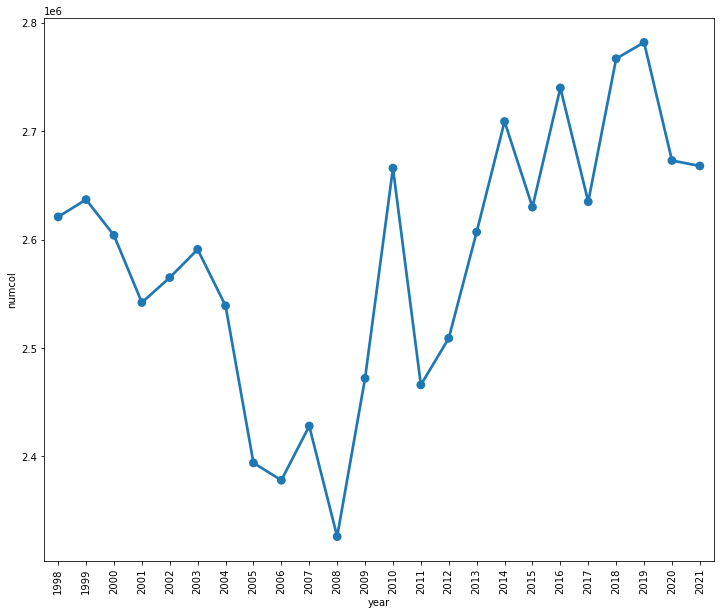

In [14]:
# sol-
# variation in the number of colonies over the years
plt.figure(figsize=(12,10))
sns.pointplot(x='year',y='numcol',data=df_1,ci=None,estimator=sum)
plt.xticks(rotation=90)
plt.show()


### we can observe from the above data that there is gradual decline in number of honeyproduction colonies from 1998-2008 but after 2008 there is continuous growth in honeyproduction colonies.

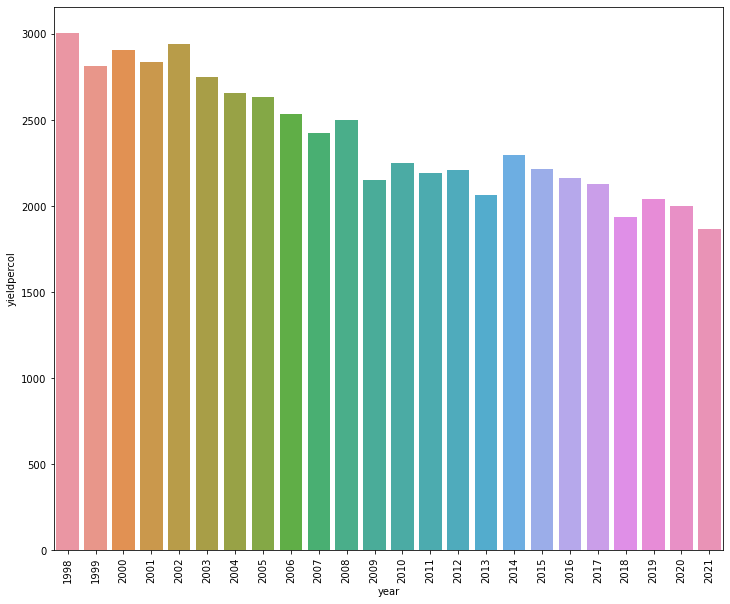

In [15]:
# variation of yield per colony over the year
plt.figure(figsize=(12,10))
sns.barplot(x='year',y='yieldpercol',data=df_1,estimator=sum,ci=None)
plt.xticks(rotation=90)
plt.show()

### we can observe in the above data that there is continuous decrease in yield per colony over the year
### This indicates that,it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony. 

### Q-4) Are there any patterns that can be observed between total honey production and value of production every year ?

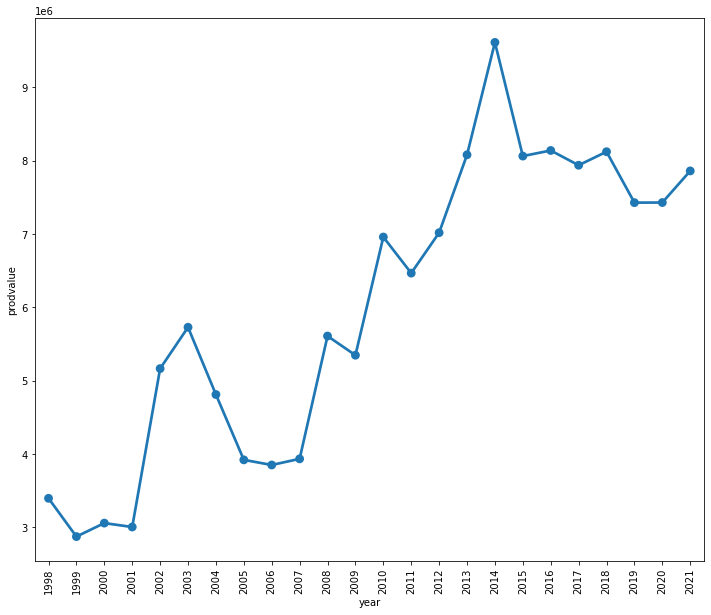

In [16]:
# Sol-
# seeing the effect,the declining production trend has on the value of production.
plt.figure(figsize=(12,10))
sns.pointplot(x='year',y='prodvalue',data=df_1,ci=None)
plt.xticks(rotation=90)
plt.show()

### we have observed interesting tend in the above data as the total production of honey decline with the passage of year the production value of honey increases with passage of time.
### As supply decline the demand has added to value of honey.

### Q-5) How has the value of production which in some sense could be tied to demand,changed every year ?

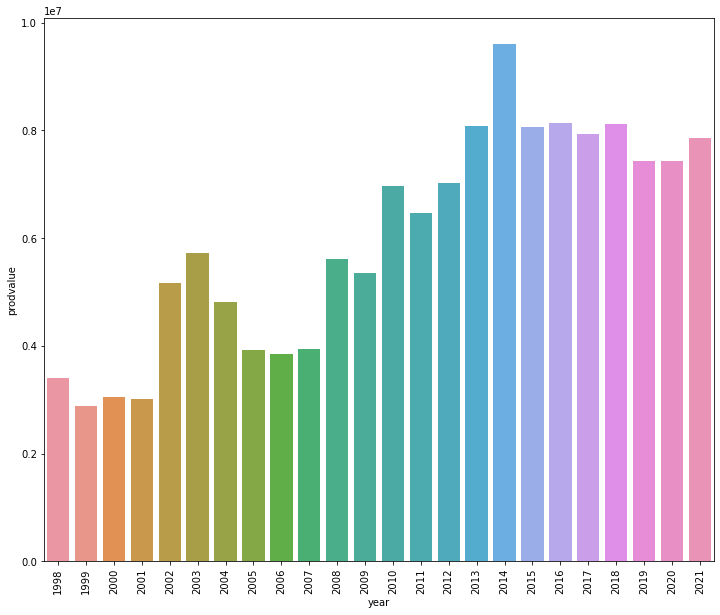

In [17]:
# sol-
plt.figure(figsize=(12,10))
sns.barplot(x='year',y='prodvalue',data=df_1,ci=None)
plt.xticks(rotation=90)
plt.show()


### This is an interesting trends.As the total production of honey decline over the year,the value of production per pound has increased over time.
### In the above data we can clearly see as the supply decline,the demand has increased and so the production value also increases with he passage of time.

# Conclusion:

### we can conclude that the total honey production has declined over the years whereas the value of production per pound has increased.
### The reason for the decline honey production is the decrease in yield per colony over the years.
### The major honey producing states are California,Florida,North Dakota,South Dakota and Montana.
### Among these,Florida has been very efficient in selling honey.